# Exercise - ICP09-CNN

In this notebook, I have displayed the graph of model loss and model accuracy for both training and test data. 

# Tutorial 1 - CNN Classification - Keras - Working with image files

We will predict the category of a fruit image.

In [1]:
import numpy as np
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

np.random.seed(1)  # for reproducibility


2023-06-18 03:25:55.776561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Image Readers

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # rescale 1./255 to normalize pixel values

training_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

Found 3879 images belonging to 10 classes.
Found 965 images belonging to 10 classes.


Let's explore the image files. ImageDataGenerator contains batches whose size was set in the batch_size parameter, let's display the first batch

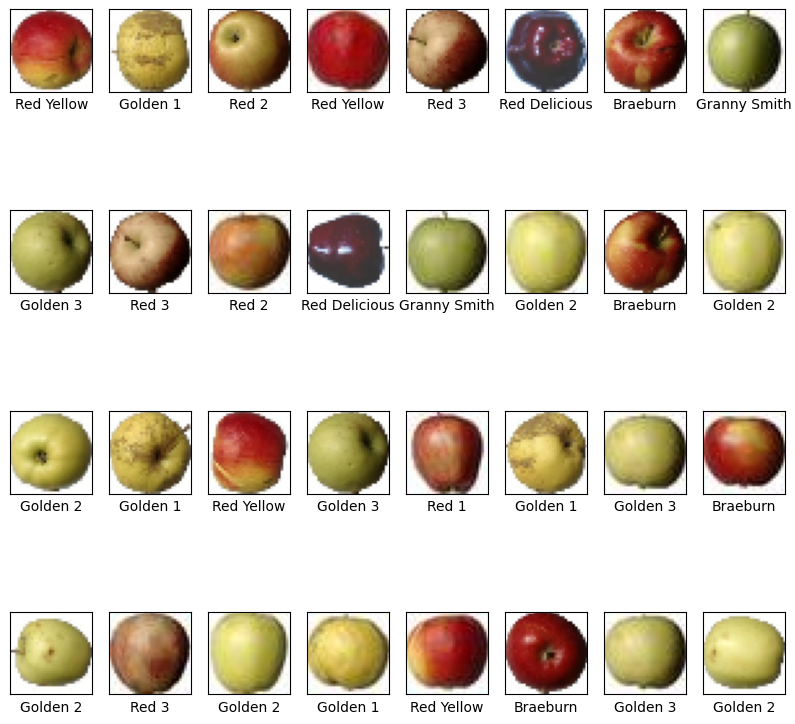

In [3]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices

# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())

# get the first batch of images and associated labels
images, labels = training_generator[0]

# get the size of the batch
batch_size = len(images)

# do some calculations to accomodate the number of images (which is determined by the batch size)
cols = 8
rows = batch_size//cols

# display the images
plt.figure(figsize=(10,10))
for i in range(batch_size):
    plt.subplot(rows,cols,i+1)
# if you prefer to see images without the grid and axes labels, uncomment the following 3 lines    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(training_labels[int(np.argmax(labels[i]))])
plt.show()

## NOTE: This section simply breaksdown some of the code above to show what is happening... this should be removed in production

In [4]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices
print(apple_name_index)

{'Braeburn': 0, 'Golden 1': 1, 'Golden 2': 2, 'Golden 3': 3, 'Granny Smith': 4, 'Red 1': 5, 'Red 2': 6, 'Red 3': 7, 'Red Delicious': 8, 'Red Yellow': 9}


In [5]:
# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())
print(training_labels)

['Braeburn', 'Golden 1', 'Golden 2', 'Golden 3', 'Granny Smith', 'Red 1', 'Red 2', 'Red 3', 'Red Delicious', 'Red Yellow']


In [6]:
# get the first batch of images and associated labels
images, labels = training_generator[0]

In [7]:
print(images.shape) # we have 32 images (our batch size) of size 32x32 with 3 channels (RGB)

(32, 32, 32, 3)


In [8]:
print(labels) # we have 32 labels (our batch size) one-hot encoded with 10 classes

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [9]:
# this will take the index for the max value in each one-hot vector and return the class name
print(labels[1])
print(np.argmax(labels[1]))
print(training_labels[int(np.argmax(labels[1]))])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
Golden 1


# Model

To find more about Convulutional layers, see the official documentation found here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [10]:
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.1))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(10, activation='softmax'))

2023-06-18 03:26:00.924634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
#history = model.fit(training_generator, validation_data=(validation_generator), epochs=100, verbose=0)

In [13]:
#train the model
history = model.fit(training_generator, validation_data=(validation_generator), epochs=100)

Epoch 1/100
122/122 [==============================] - 3s 18ms/step - loss: 0.7474 - accuracy: 0.7352 - val_loss: 1.0220 - val_accuracy: 0.7472
Epoch 2/100
122/122 [==============================] - 2s 16ms/step - loss: 0.0548 - accuracy: 0.9876 - val_loss: 0.9481 - val_accuracy: 0.7865
Epoch 3/100
122/122 [==============================] - 2s 16ms/step - loss: 0.0137 - accuracy: 0.9982 - val_loss: 0.9893 - val_accuracy: 0.8083
Epoch 4/100
122/122 [==============================] - 2s 16ms/step - loss: 0.0076 - accuracy: 0.9990 - val_loss: 1.0614 - val_accuracy: 0.8435
Epoch 5/100
122/122 [==============================] - 2s 16ms/step - loss: 0.0293 - accuracy: 0.9915 - val_loss: 0.8592 - val_accuracy: 0.8528
Epoch 6/100
122/122 [==============================] - 2s 16ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9484 - val_accuracy: 0.7948
Epoch 7/100
122/122 [==============================] - 2s 16ms/step - loss: 7.8718e-04 - accuracy: 1.0000 - val_loss: 0.9669 - val_accur

### Evaluation of model's performance through accuracy and loss plots

In [14]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.5f}")

31/31 [==============================] - 0s 6ms/step - loss: 1.8417 - accuracy: 0.8663
Loss 1.84174
Accuracy 0.86632


In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


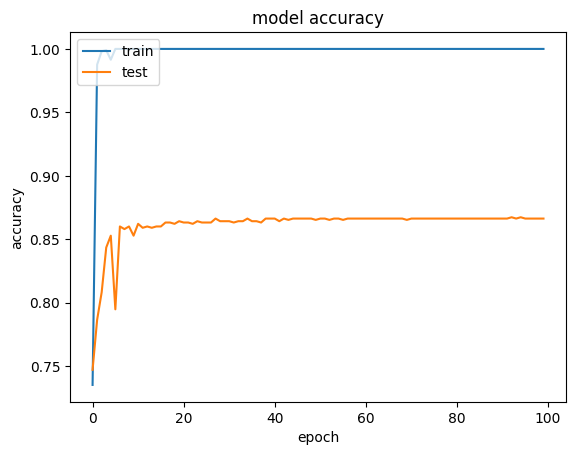

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

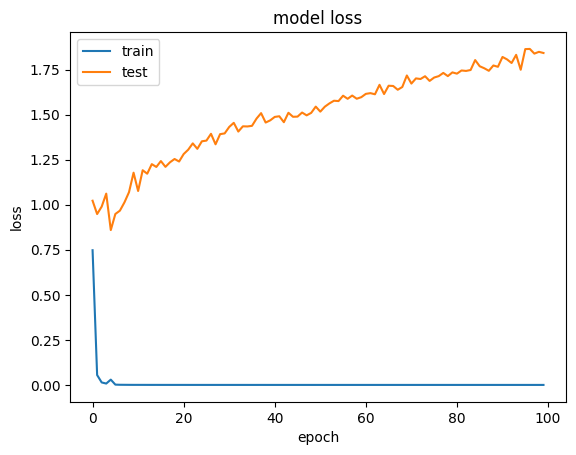

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize the model and it's performance

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confution Matrix and Classification Report
#Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# y_test is the actual labels
y_test = validation_generator.classes

#target_names = species of apples (class names)
target_names = list(training_generator.class_indices.keys())

31/31 [==============================] - 0s 6ms/step


In [20]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

               precision    recall  f1-score   support

     Braeburn     0.5976    1.0000    0.7481        98
     Golden 1     0.6087    1.0000    0.7568        98
     Golden 2     1.0000    1.0000    1.0000        98
     Golden 3     1.0000    1.0000    1.0000        96
 Granny Smith     1.0000    1.0000    1.0000        98
        Red 1     1.0000    1.0000    1.0000        98
        Red 2     1.0000    0.3265    0.4923        98
        Red 3     1.0000    1.0000    1.0000        85
Red Delicious     1.0000    1.0000    1.0000        98
   Red Yellow     1.0000    0.3571    0.5263        98

     accuracy                         0.8663       965
    macro avg     0.9206    0.8684    0.8523       965
 weighted avg     0.9194    0.8663    0.8501       965



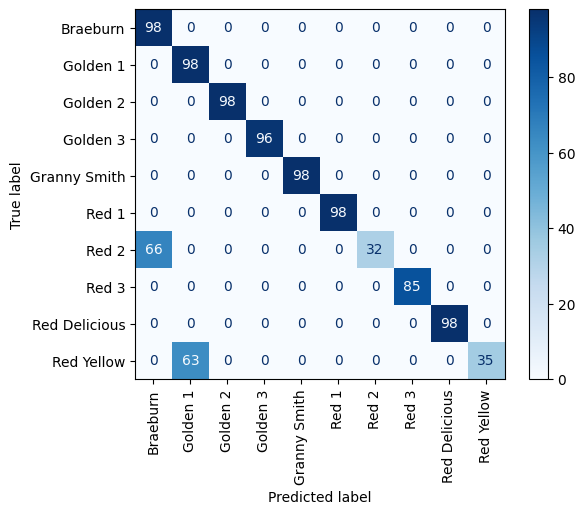

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# display the confusion matrix
#y_test = validation_generator.classes
#y_pred = model.predict(validation_generator).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

## Conclusion


In the above graphs, the accuracy and loss plots for both the training data and the validation data are shown over 100 epochs of a training process.


1. Accuracy Plot:
   - Training Data: The model has quickly learned to classify the training data. This is demonstrated in its ability to reach 100% accuracy by 6th Epoch itself. It has maintained this high accuracy till the end of the training process. This could suggest overfitting as the model is able is perfectly fit the training data.
   - Validation Data: We can see that the model is able to start with an accuracy of 74.72% on test data at the 1st Epoch and sees continuous rise till 6th Epoch reaching 85.28%. A dip ensues followed by rise in accuracy to around 85%. From 16th Epoch to till the end of the training process, the accuracy hovers between 86-87%.  We can observe that after initial rise in accuracy, there is no significant improvement at later stages indicating that model might not be generalizing too well to the test data.

2. Loss Plot:
   - Training Data: The model starts with a loss of 74.74% with the training set at the 1st Epoch. But it appears to significantly decrease consistently to less than 1% in later epochs.
   - Validation Data: The model loss on test data has several fluctuations over the span of 100 epochs. We can observe though that there is general trend of increase in the loss value. This could mean that model’s performance is dropping with respect to unseen data. 
